In [1]:
!git clone https://github.com/muxspace/facial_expressions.git

Cloning into 'facial_expressions'...
Updating files:  13% (1851/13996)
Updating files:  14% (1960/13996)
Updating files:  15% (2100/13996)
Updating files:  16% (2240/13996)
Updating files:  17% (2380/13996)
Updating files:  18% (2520/13996)
Updating files:  19% (2660/13996)
Updating files:  20% (2800/13996)
Updating files:  21% (2940/13996)
Updating files:  22% (3080/13996)
Updating files:  23% (3220/13996)
Updating files:  24% (3360/13996)
Updating files:  25% (3499/13996)
Updating files:  26% (3639/13996)
Updating files:  26% (3712/13996)
Updating files:  27% (3779/13996)
Updating files:  28% (3919/13996)
Updating files:  29% (4059/13996)
Updating files:  30% (4199/13996)
Updating files:  31% (4339/13996)
Updating files:  32% (4479/13996)
Updating files:  33% (4619/13996)
Updating files:  34% (4759/13996)
Updating files:  35% (4899/13996)
Updating files:  36% (5039/13996)
Updating files:  37% (5179/13996)
Updating files:  38% (5319/13996)
Updating files:  38% (5404/13996)
Updating fi

In [8]:
import csv
data={}
with open("facial_expressions/data/legend.csv") as file_obj:
    file_data = csv.DictReader(file_obj,skipinitialspace = True)
    for row in file_data:
        key = row["emotion"].lower()
        if key in data:
            data[key].append(row['image'])
        else:
            data[key] = [row['image']]
data

{'anger': ['facial-expressions_2868588k.jpg',
  'Alejandro_Toledo_0004.jpg',
  'Alexander_Lukashenko_0001.jpg',
  'Alicia_Hollowell_0001.jpg',
  'Alvaro_Noboa_0002.jpg',
  'Al_Gore_0002.jpg',
  'Anastasia_Myskina_0001.jpg',
  'Anastasia_Myskina_0003.jpg',
  'Angelina_Jolie_0005.jpg',
  'Arnold_Schwarzenegger_0023.jpg',
  'Atal_Bihari_Vajpayee_0010.jpg',
  'Ben_Braun_0001.jpg',
  'Billy_Crystal_0004.jpg',
  'Billy_Donovan_0001.jpg',
  'Bill_Graham_0005.jpg',
  'Bob_Huggins_0001.jpg',
  'Bob_Huggins_0004.jpg',
  'Brian_Scalabrine_0001.jpg',
  'Bud_Selig_0004.jpg',
  'Carlos_Arroyo_0001.jpg',
  'Carlos_Ortega_0001.jpg',
  'Celine_Dion_0008.jpg',
  'Charles_Moose_0001.jpg',
  'Charles_Moose_0002.jpg',
  'Charles_Moose_0004.jpg',
  'Charles_Moose_0006.jpg',
  'Charles_Moose_0013.jpg',
  'Colin_Powell_0007.jpg',
  'Colin_Powell_0030.jpg',
  'Colin_Powell_0043.jpg',
  'Colin_Powell_0055.jpg',
  'Colin_Powell_0149.jpg',
  'Colin_Powell_0180.jpg',
  'Colin_Powell_0181.jpg',
  'Colin_Powell_0188

In [10]:
emotions_list = list(data.keys())
emotions_list,len(emotions_list)

(['anger',
  'surprise',
  'disgust',
  'fear',
  'neutral',
  'happiness',
  'sadness',
  'contempt'],
 8)

In [11]:
import os
os.mkdir('master_data')
os.mkdir('master_data/training')
os.mkdir('master_data/testing')

In [13]:
for emotion in emotions_list:
    os.mkdir(os.path.join('master_data/training',emotion))
    os.mkdir(os.path.join('master_data/testing',emotion))

In [14]:
data.items()

dict_items([('anger', ['facial-expressions_2868588k.jpg', 'Alejandro_Toledo_0004.jpg', 'Alexander_Lukashenko_0001.jpg', 'Alicia_Hollowell_0001.jpg', 'Alvaro_Noboa_0002.jpg', 'Al_Gore_0002.jpg', 'Anastasia_Myskina_0001.jpg', 'Anastasia_Myskina_0003.jpg', 'Angelina_Jolie_0005.jpg', 'Arnold_Schwarzenegger_0023.jpg', 'Atal_Bihari_Vajpayee_0010.jpg', 'Ben_Braun_0001.jpg', 'Billy_Crystal_0004.jpg', 'Billy_Donovan_0001.jpg', 'Bill_Graham_0005.jpg', 'Bob_Huggins_0001.jpg', 'Bob_Huggins_0004.jpg', 'Brian_Scalabrine_0001.jpg', 'Bud_Selig_0004.jpg', 'Carlos_Arroyo_0001.jpg', 'Carlos_Ortega_0001.jpg', 'Celine_Dion_0008.jpg', 'Charles_Moose_0001.jpg', 'Charles_Moose_0002.jpg', 'Charles_Moose_0004.jpg', 'Charles_Moose_0006.jpg', 'Charles_Moose_0013.jpg', 'Colin_Powell_0007.jpg', 'Colin_Powell_0030.jpg', 'Colin_Powell_0043.jpg', 'Colin_Powell_0055.jpg', 'Colin_Powell_0149.jpg', 'Colin_Powell_0180.jpg', 'Colin_Powell_0181.jpg', 'Colin_Powell_0188.jpg', 'Colleen_Jones_0001.jpg', 'Dariusz_Michalczewski_

In [16]:
from shutil import copyfile

split_size = 0.8

for emotion,images in data.items():
    train_size = int(split_size*len(images))
    training_images = images[:train_size]
    testing_images = images[train_size:]
    
    for image in training_images:
        source = os.path.join('facial_expressions/images',image)
        dest = os.path.join('master_data/training',emotion,image)
        copyfile(source,dest)
    
    for image in testing_images:
        source = os.path.join('facial_expressions/images',image)
        dest = os.path.join('master_data/testing',emotion,image)
        copyfile(source,dest)
    

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [67]:
model = tf.keras.models.Sequential([
    Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    Conv2D(32,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(8,activation='softmax')
])
model.compile(optimizer = Adam(),metrics=['acc'],loss='categorical_crossentropy')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 128)        

In [21]:
train_dir = 'master_data/training'
test_dir = 'master_data/testing'

train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(100,100),class_mode='categorical',batch_size = 128)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(100,100),class_mode='categorical',batch_size = 128)

Found 10941 images belonging to 8 classes.
Found 2742 images belonging to 8 classes.


In [32]:
import matplotlib.pyplot as plt

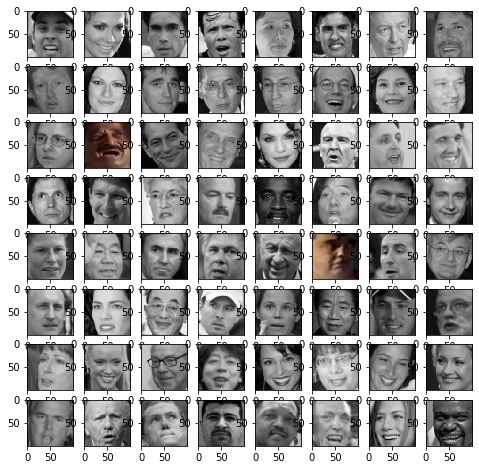

In [59]:
figure = plt.figure(figsize=(8,8))
for i in range(64):
    ax = figure.add_subplot(8,8,i+1)
    plt.imshow(train_generator[0][0][i])

In [68]:
es =EarlyStopping(monitor='val_acc',patience=2,min_delta=0.001)

In [69]:
model.fit_generator(train_generator,epochs=10,verbose=1,validation_data=test_generator,callbacks=[es])

Epoch 1/10
86/86 [==============================] - 66s 768ms/step - loss: 1.0301 - acc: 0.5125 - val_loss: 2.3827 - val_acc: 0.5912
Epoch 2/10
86/86 [==============================] - 64s 744ms/step - loss: 0.7681 - acc: 0.7426 - val_loss: 1.8252 - val_acc: 0.6510
Epoch 3/10
86/86 [==============================] - 62s 724ms/step - loss: 0.6073 - acc: 0.8007 - val_loss: 2.1266 - val_acc: 0.6685
Epoch 4/10
86/86 [==============================] - 63s 736ms/step - loss: 0.5288 - acc: 0.8241 - val_loss: 1.5358 - val_acc: 0.6780
Epoch 5/10
86/86 [==============================] - 58s 674ms/step - loss: 0.4749 - acc: 0.8410 - val_loss: 1.2600 - val_acc: 0.7046
Epoch 6/10
86/86 [==============================] - 58s 672ms/step - loss: 0.4259 - acc: 0.8571 - val_loss: 1.4823 - val_acc: 0.6951
Epoch 7/10
86/86 [==============================] - 58s 673ms/step - loss: 0.3958 - acc: 0.8682 - val_loss: 1.4347 - val_acc: 0.6991


In [70]:
predictions = model.predict_generator(test_generator)
predictions

array([[9.4595030e-03, 4.6761820e-04, 3.0117914e-01, ..., 7.7141817e-03,
        5.8509725e-01, 4.5054713e-03],
       [8.5486379e-03, 4.8473425e-04, 9.1406697e-04, ..., 7.5305611e-01,
        9.1343960e-03, 6.8902248e-04],
       [4.3877810e-03, 1.2689031e-04, 3.7140620e-01, ..., 2.2034678e-03,
        5.6048048e-01, 3.2588567e-03],
       ...,
       [3.4966890e-04, 6.6621717e-05, 1.9572902e-04, ..., 9.6411663e-01,
        1.6084976e-03, 1.8232915e-03],
       [8.5855993e-03, 7.0393033e-04, 1.1313887e-03, ..., 2.0252050e-01,
        5.2824519e-03, 8.3149341e-04],
       [2.6419172e-01, 3.7473810e-03, 6.9243531e-04, ..., 6.0761356e-01,
        1.6116206e-02, 9.9450104e-02]], dtype=float32)

In [75]:
pred = tf.argmax(predictions,1)

In [88]:
sess = tf.Session()
sess.run(pred)

array([6, 5, 6, ..., 5, 4, 5], dtype=int64)